# Project 3

- Insurance 데이터
- 여러 모델을 만들고 성능을 예측해 평가하고 모델 튜닝

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [9]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/insurance.csv'
data = pd.read_csv(path)

In [10]:
# 데이터 확인
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# 기초통계량 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# x, y 분리
target = 'charges'

x = data.drop(target, axis=1)
y = data.loc[:, target]

In [13]:
# 가변수화 : sex, smoker, region
dumm_cols = ['sex', 'smoker', 'region']
x = pd.get_dummies(data=x, columns=dumm_cols, drop_first=True)
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [14]:
# train, test 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

In [16]:
# 필요한 함수 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score

In [18]:
# 결과 기록용 변수
result = {}

In [19]:
# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['Linear Regression'] = r2_score(y_test, y_pred)
result

mae: 4139.932064766011
r2: 0.7405989316927213


{'Linear Regression': 0.7405989316927213}

In [20]:
# KNN
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train_s, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['KNN'] = r2_score(y_test, y_pred)
result

mae: 9730.970598502488
r2: -0.11533012327140302


{'Linear Regression': 0.7405989316927213, 'KNN': -0.11533012327140302}

In [21]:
# Decision Tree
model = DecisionTreeRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['Decision Tree'] = r2_score(y_test, y_pred)
result

mae: 2611.160554800387
r2: 0.8361746058065047


{'Linear Regression': 0.7405989316927213,
 'KNN': -0.11533012327140302,
 'Decision Tree': 0.8361746058065047}

In [23]:
# Random Forest
model = RandomForestRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['Random Forest'] = r2_score(y_test, y_pred)
result

mae: 2518.831554200329
r2: 0.8534612666309194


{'Linear Regression': 0.7405989316927213,
 'KNN': -0.11533012327140302,
 'Decision Tree': 0.8361746058065047,
 'Random Forest': 0.8534612666309194}

In [24]:
# XGBoost
model = XGBRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['XGBoost'] = r2_score(y_test, y_pred)
result

mae: 2875.4666043485327
r2: 0.8198745374081555


{'Linear Regression': 0.7405989316927213,
 'KNN': -0.11533012327140302,
 'Decision Tree': 0.8361746058065047,
 'Random Forest': 0.8534612666309194,
 'XGBoost': 0.8198745374081555}

In [28]:
# LightGBM
model = LGBMRegressor(max_depth=5, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

result['LightGBM'] = r2_score(y_test, y_pred)
result

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 8
[LightGBM] [Info] Start training from score 13276.698540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

{'Linear Regression': 0.7405989316927213,
 'KNN': -0.11533012327140302,
 'Decision Tree': 0.8361746058065047,
 'Random Forest': 0.8534612666309194,
 'XGBoost': 0.8198745374081555,
 'LightGBM': 0.855270067463728}

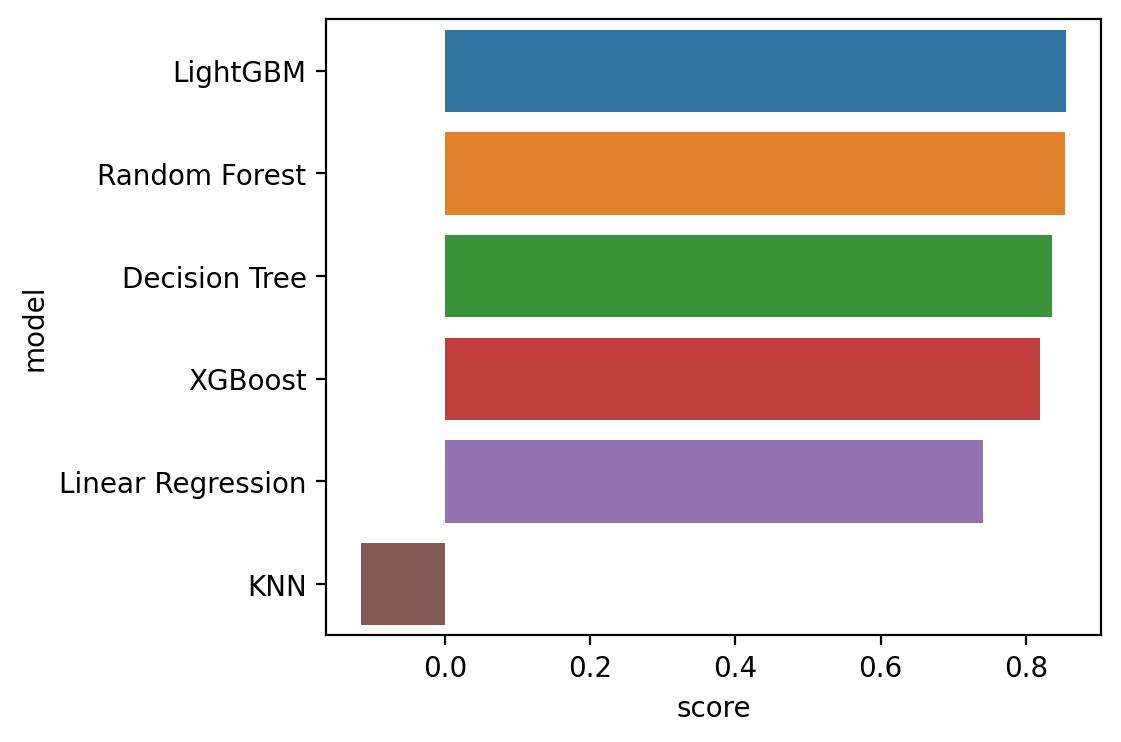

In [29]:
perf_dic = {'model': result.keys(), 'score': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score', ascending=False, inplace=True)

plt.figure(figsize=(5, 4))
sns.barplot(x=df['score'], y=df['model'])
plt.show()

In [30]:
# LightGBM 튜닝
from sklearn.model_selection import GridSearchCV

param = {'max_depth': range(1, 31)}
model_dt = LGBMRegressor(random_state=1)
model = GridSearchCV(model_dt,
                     param,
                     cv=5,
                     scoring='r2')

In [31]:
model.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 311
[LightGBM] [Info] Number of data points in the train set: 748, number of used features: 8
[LightGBM] [Info] Start training from score 13260.110186
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 8
[LightGBM] [Info] Start training from score 13368.998507
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 313
[LightGBM] [Info] Number of data points in the train set: 749, number of used features: 8
[LightGBM] [Info] Star

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1),
             param_grid={'max_depth': range(1, 31)}, scoring='r2')

In [33]:
# 결과 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print(model.best_params_)
print('-' * 80)
print(model.best_score_)
print('=' * 80)

[0.75137514 0.84915063 0.84863489 0.84301272 0.84133641 0.83782793
 0.83472144 0.83286229 0.832255   0.82991409 0.83046031 0.82896944
 0.83053678 0.82923791 0.82827435 0.82943671 0.82739086 0.82832948
 0.82712672 0.82828684 0.82793104 0.82811207 0.82766795 0.82766795
 0.82766795 0.82766795 0.82766795 0.82766795 0.82766795 0.82766795]
--------------------------------------------------------------------------------
{'max_depth': 2}
--------------------------------------------------------------------------------
0.8491506255980352


In [34]:
# 성능 평가
y_pred = model.predict(x_test)

print('mae:', mean_absolute_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 2559.83201701893
r2: 0.858007406378896
